
# Lab 9: Build a Log Aggregator

In this lab, you will create your own log generator, build a command-line utility that scans log files, summarizes their contents, and provides insight into system behavior. Data structures to track log message levels such as `INFO`, `WARNING`, `ERROR`, and `CRITICAL`.

This lab reinforces:
- File I/O
- Pattern recognition (regex)
- Dictionaries and counters
- Functions and modularity
- Optional: CLI arguments, logging



## Part 1: Create Log files (20%)
Using the the following example log format below create a **python file** that will log errors In a structured tree format 

You will find examples in the folder called Logs that you can use to build your program.

Remember set of logs should have a varied levels of log entries (`INFO`, `WARNING`, `ERROR`, `CRITICAL`) and tailored message types for different service components.
You must create 5 structured logs here are some examples:

    sqldb
    ui
    frontend.js
    backend.js
    frontend.flask
    backend.flask

You may use chat GPT to create sample outputs NOT THE LOGS. IE:

    System failure
    Database corruption
    Disk failure detected
    Database corruption


In [ ]:
# Paste your python file here 
# don't forget to upload it with your submission




### Example Log Format

You will work with logs that follow this simplified structure:

```
2025-04-11 23:20:36,913 | my_app | INFO | Request completed
2025-04-11 23:20:36,914 | my_app.utils | ERROR | Unhandled exception
2025-04-11 23:20:36,914 | my_app.utils.db | CRITICAL | Disk failure detected
```


In [ ]:
import logging
import random
import time
from datetime import datetime


options = ["INFO", "WARNING", "ERROR", "CRITICAL"]
possible_messages = [ " System failure", "Database corruption",
    "Disk failure detected", "Database corruption"]

file_path_base = "logGLfolder\\log"
file_path_postfix_core = "_core"
file_path_postfix_utils = "_utils"
file_path_second_postfix = "_db"

postfix_group = [file_path_postfix_core, file_path_postfix_utils,0]

second_postfix_group = [file_path_second_postfix,0]


file_path_extension = ".log"




now = datetime.now()

def getCurrentTime():
    return now.strftime("%Y-%m-%d %H:%M:%S")

def getRandomLogLevel():
    return random.choice(options)

def getRandomMessage():
    return random.choice(possible_messages)




for i in range(100):
    log_level = getRandomLogLevel()
    message = getRandomMessage()

    postfix = random.choice(postfix_group)
    second_postfix = random.choice(second_postfix_group)


    

    if postfix == 0:
        file_path = file_path_base + file_path_extension

        log_message = f"{getCurrentTime()} | {file_path} | {log_level} | {message}\n"

        with open(file_path, "a") as file:
                file.write(log_message)
    else:
        if second_postfix == 0:
            file_path = file_path_base + postfix + file_path_extension


            log_message = f"{getCurrentTime()} | {file_path} | {log_level} | {message}\n"
        

            # can be done recursively - split by the underscore remove the last item and recombine into a string
            with open(file_path, "a") as file:
                file.write(log_message)

            file_path = file_path_base + file_path_extension

            with open(file_path, "a") as file:
                file.write(log_message)


        else:
            file_path = file_path_base + postfix + second_postfix + file_path_extension

            log_message = f"{getCurrentTime()} | {file_path} | {log_level} | {message}\n"
        
            with open(file_path, "a") as file:
                file.write(log_message)

            file_path = file_path_base + postfix + file_path_extension

            with open(file_path, "a") as file:
                file.write(log_message)

            file_path = file_path_base  + file_path_extension

            with open(file_path, "a") as file:
                file.write(log_message)






## Part 2: Logging the Log File (40%)
    New File
### Part 2a: Read the Log File (see lab 7) (10%)


Write a function to read the contents of a log file into a list of lines. Handle file errors gracefully.

### Part 2b: Parse Log Lines (see code below if you get stuck) (10%)

Use a regular expression to extract:
- Timestamp
- Log name
- Log level
- Message

### Part 2c: Count Log Levels (20%)

Create a function to count how many times each log level appears. Store the results in a dictionary. Then output it as a Json File
You may pick your own format but here is an example. 
```python
{
    "INFO": 
    {
        "Request completed": 42, 
        "Heartbeat OK": 7
    }

    "WARNING":
    {
        ...
    }
}

```


In [ ]:
import logging
import random
import time
from datetime import datetime



# pretty much does 2b and 3a 
# creates a thread that reads the log as its being written to 
# at the end pritns the summary of the log file for all levels of logging including critical


dictionary = {"INFO": {}, "WARNING": {}, "ERROR": {}, "CRITICAL": {}}



def new_line_reader(log_file_path):
  try:
    with open(log_file_path, 'r') as file_:
      file_.seek(0, 2)
      while True:
        line = file_.readline()
        if not line:
          time.sleep(0.001)  # Wait briefly if no new lines
          continue
        yield line
  except FileNotFoundError:
    print(f"Error: Log file not found at {log_file_path}")
  except Exception as e:
    print(f"An error occurred: {e}")


# added this to try and solve hanging issue
def exitTimer():
  # Exit timer for the program
  print("Exiting in 10 seconds...")
  time.sleep(10)
  print("Exiting now.")
  exit(0)


def logParser(log_file_path, data_dict):

  if not log_file_path:
    log_file_path = "logGL.log"
  log_generator = new_line_reader(log_file_path)
  print(f"Monitoring log file: {log_file_path}")

  try:
    for line in log_generator:
      # print(f"New log entry: {line.strip()}")
      items = line.split("|")
      # format of data, [time, file_path, log_level, message]
      # print(items[2])

      if (items[2].strip() == "CRITICAL"):
        print("Critical log entry detected!\n")
        print(f"Time: {items[0]} CRITICAL Found at {items[1]} with message: {items[3]}")



      if items[2].strip() in data_dict:
        if 'count' not in data_dict[items[2].strip()]:
          data_dict[items[2].strip()]['count'] = 0
          # print(f"Updated dictionary: {data_dict}")

        data_dict[items[2].strip()]['count'] += 1
        # print(f"Updated dictionary: {data_dict}")
    
      
        if items[3].strip() in data_dict[items[2].strip()]:
          data_dict[items[2].strip()][items[3].strip()] += 1
        else:
          data_dict[items[2].strip()][items[3].strip()] = 1
          # print(f"Updated dictionary: {data_dict}")

  except KeyboardInterrupt:
    print("\nMonitoring stopped.")




if __name__ == "__main__":
  log_file_path = "logGL.log"
  logParser(log_file_path, dictionary)
  exitTimer()

  



In [ ]:
# Paste your python file here 
# don't forget to upload it with your submission


## Step 3: Generate Summary Report (40%)
    New File
### Step 3a (20%):
 Develop a function that continuously monitors your JSON file(s) and will print a real-time summary of log activity. It should keep count of the messages grouped by log level (INFO, WARNING, ERROR, CRITICAL) and display only the critical messages. (I.e. If new data comes in the summary will change and a new critical message will be printed)
 - note: do not reprocess the entire file on each update.  

### Step 3a: Use a Matplotlib (Lecture 10) (20%)
Develop a function that continuously monitors your JSON file(s) and will graph in real-time a bar or pie plot of each of the errors.  (a graph for each log level). 
- The graph should show the distribution of log messages by level  (INFO, WARNING, ERROR, CRITICAL)  


### Critical notes:
- Your code mus use Daemon Threads (Lecture 14)
- 3a and 3b do not need to run at the same time. 


Counts for Database corruption: [3, 3, 6, 3]
Counts for System failure: [3, 1, 3, 4]
Counts for Disk failure detected: [2, 1, 2, 2]


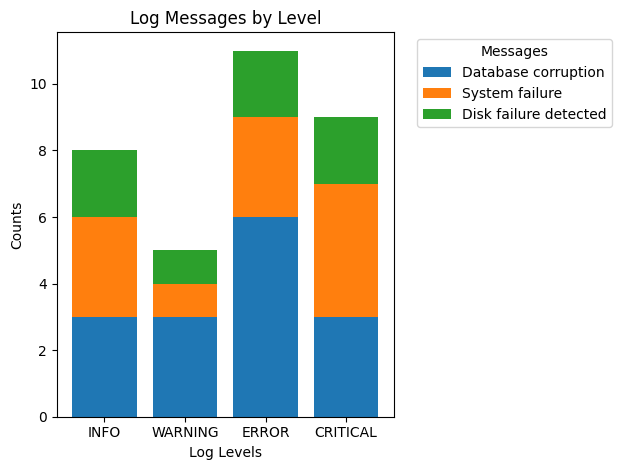

Final dictionary: {'INFO': {'count': 8, 'Database corruption': 3, 'Disk failure detected': 2, 'System failure': 3}, 'WARNING': {'count': 5, 'Disk failure detected': 1, 'Database corruption': 3, 'System failure': 1}, 'ERROR': {'count': 11, 'Database corruption': 6, 'System failure': 3, 'Disk failure detected': 2}, 'CRITICAL': {'count': 9, 'Disk failure detected': 2, 'System failure': 4, 'Database corruption': 3}}


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time

# sample dict
dictionary = {
                'INFO': {'count': 8, 
                        'Database corruption': 3, 
                        'Disk failure detected': 2, 
                        'System failure': 3}, 
                'WARNING': {'count': 5, 
                            'Disk failure detected': 1, 
                            'Database corruption': 3, 
                            'System failure': 1}, 
                'ERROR': {'count': 11, 
                            'Database corruption': 6, 
                            'System failure': 3, 
                            'Disk failure detected': 2}, 
                'CRITICAL': {'count': 9, 
                                'Disk failure detected': 2, 
                                'System failure': 4, 
                                'Database corruption': 3}
                } 


def draw_graph(dictionary):
    # Prepare data for the graph
    log_levels = list(dictionary.keys())
    messages = set()
    for details in dictionary.values():
        messages.update(details.keys())
    messages.discard('count')  # Remove the 'count' key

 
    message_counts = {message: [] for message in messages}

    for log_level in log_levels:
        for message in messages:
            count = dictionary[log_level].get(message, 0)
            message_counts[message].append(count)

    


    # had to use np to stack dataframes
    # https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html
    # Plot the data
    x = range(len(log_levels))
    # plt.figure(figsize=(12, 6))
    # Stack the bars for each message
    bottom = np.zeros(len(log_levels))
    for message, counts in message_counts.items():
        print(f"Counts for {message}: {counts}")
        plt.bar(x, counts, bottom=bottom, label=message)
        bottom += np.array(counts)  # Update the bottom for stacking
    plt.xlabel('Log Levels')
    plt.ylabel('Counts')
    plt.title('Log Messages by Level')
    plt.xticks(x, log_levels)
    plt.legend(title="Messages", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

def dict_listener(dictionary):
    # This function is a placeholder for any additional processing you want to do with the dictionary
    # For now, it just prints the dictionary
    print("Updated dictionary:", dictionary)
    temp  = {"INFO": {}, "WARNING": {}, "ERROR": {}, "CRITICAL": {}}
    
    start_time = time.time()
    while time.time() - start_time < 10:
        
        if temp != dictionary:
            # If the dictionary has changed, update the graph
            draw_graph(dictionary)
            # Update the temp variable to the current state of the dictionary
            temp = dictionary.copy()
        time.sleep(0.001)
        




if __name__ == "__main__":
    # Print the dictionary in a formatted way
    draw_graph(dictionary)
    print("Final dictionary:", dictionary)
   


# Final program running all in parallel

Monitoring log file: logGLfolder\log.logUpdated dictionary: {'INFO': {}, 'WARNING': {}, 'ERROR': {}, 'CRITICAL': {}}

Counts for Disk failure detected: [0, 1, 0, 0]
Critical log entry detected!

Time: 2025-04-27 18:36:12  CRITICAL Found at  logGLfolder\log_utils_db.log  with message:  Disk failure detected

Critical log entry detected!

Time: 2025-04-27 18:36:12  CRITICAL Found at  logGLfolder\log.log  with message:  Disk failure detected

Critical log entry detected!

Time: 2025-04-27 18:36:12  CRITICAL Found at  logGLfolder\log_utils_db.log  with message:   System failure



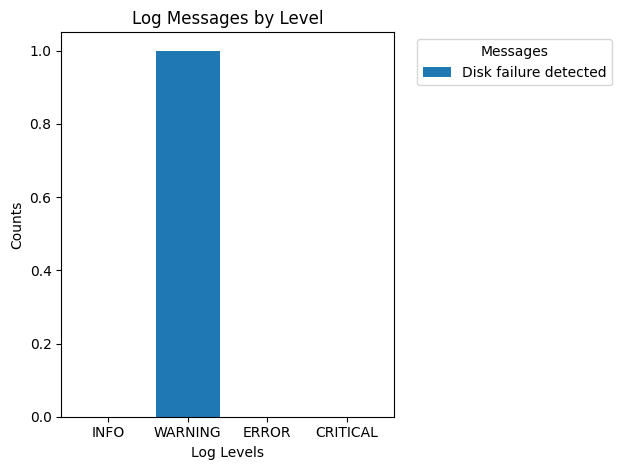

Critical log entry detected!

Time: 2025-04-27 18:36:12  CRITICAL Found at  logGLfolder\log.log  with message:  Database corruption

Counts for Database corruption: [0, 1, 0, 1]
Counts for Disk failure detected: [0, 1, 0, 2]
Counts for System failure: [0, 1, 2, 1]


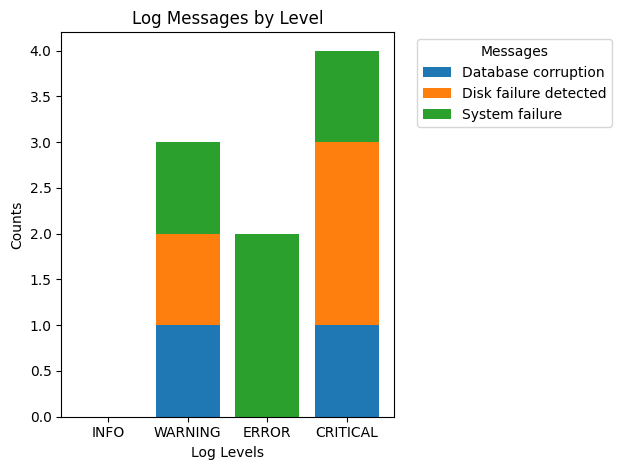

Counts for Database corruption: [2, 1, 2, 1]
Counts for Disk failure detected: [1, 2, 0, 2]
Counts for System failure: [1, 1, 3, 1]
Critical log entry detected!

Time: 2025-04-27 18:36:12  CRITICAL Found at  logGLfolder\log_utils_db.log  with message:  Database corruption



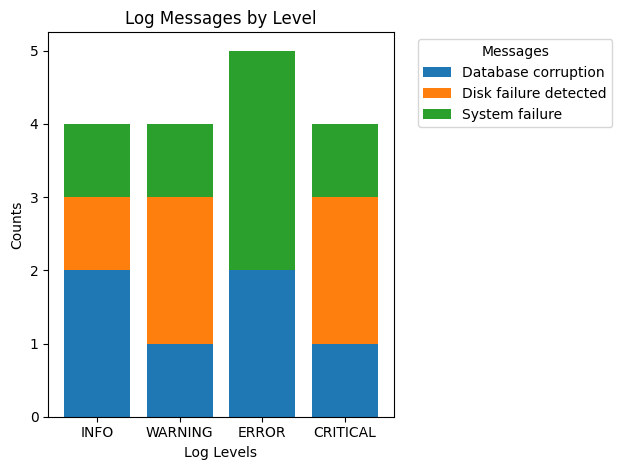

Critical log entry detected!

Time: 2025-04-27 18:36:12  CRITICAL Found at  logGLfolder\log_core.log  with message:  Disk failure detected

Counts for Database corruption: [3, 3, 3, 2]
Counts for Disk failure detected: [1, 2, 0, 3]
Counts for System failure: [1, 1, 4, 1]


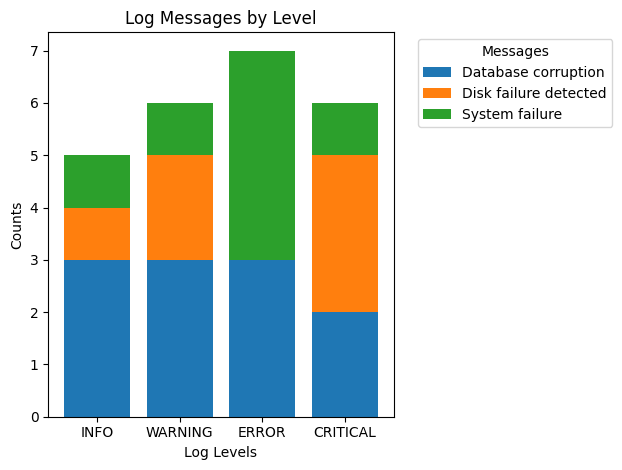

Critical log entry detected!

Time: 2025-04-27 18:36:12  CRITICAL Found at  logGLfolder\log_core_db.log  with message:  Disk failure detected

Counts for Database corruption: [4, 5, 3, 2]
Counts for Disk failure detected: [1, 2, 1, 4]
Counts for System failure: [2, 2, 4, 1]
Critical log entry detected!

Time: 2025-04-27 18:36:12  CRITICAL Found at  logGLfolder\log_core_db.log  with message:   System failure

Critical log entry detected!

Time: 2025-04-27 18:36:12  CRITICAL Found at  logGLfolder\log.log  with message:  Disk failure detected

Critical log entry detected!

Time: 2025-04-27 18:36:12  CRITICAL Found at  logGLfolder\log.log  with message:  Database corruption



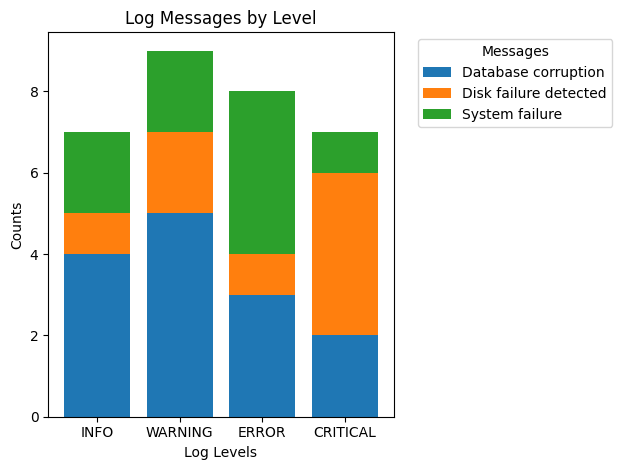

Counts for Database corruption: [4, 7, 3, 3]
Counts for Disk failure detected: [2, 3, 1, 5]
Counts for System failure: [2, 2, 4, 2]
Critical log entry detected!

Time: 2025-04-27 18:36:12  CRITICAL Found at  logGLfolder\log_core.log  with message:  Disk failure detected

Critical log entry detected!

Time: 2025-04-27 18:36:12  CRITICAL Found at  logGLfolder\log_core_db.log  with message:   System failure



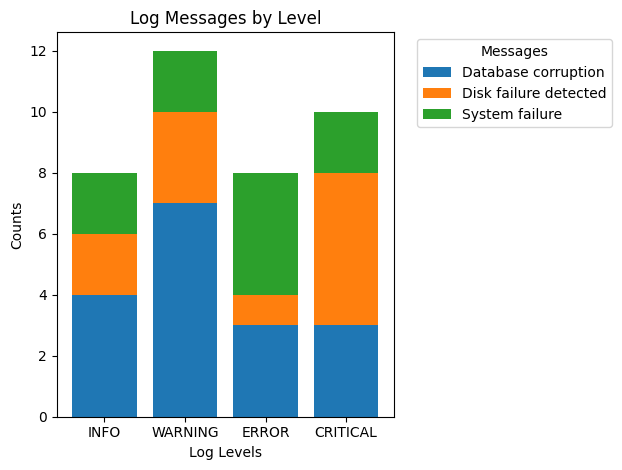

Counts for Database corruption: [5, 8, 5, 3]
Counts for Disk failure detected: [2, 3, 1, 6]
Counts for System failure: [3, 2, 4, 3]
Critical log entry detected!

Time: 2025-04-27 18:36:12  CRITICAL Found at  logGLfolder\log.log  with message:  Disk failure detected

Critical log entry detected!

Time: 2025-04-27 18:36:12  CRITICAL Found at  logGLfolder\log.log  with message:   System failure



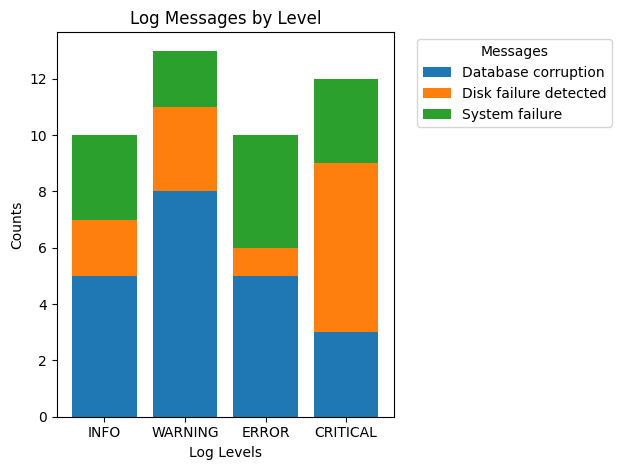

Counts for Database corruption: [5, 9, 7, 3]
Counts for Disk failure detected: [2, 3, 1, 7]
Counts for System failure: [4, 2, 6, 4]
Critical log entry detected!

Time: 2025-04-27 18:36:12  CRITICAL Found at  logGLfolder\log_utils.log  with message:  Database corruption

Critical log entry detected!

Time: 2025-04-27 18:36:12  CRITICAL Found at  logGLfolder\log.log  with message:  Database corruption

Critical log entry detected!

Time: 2025-04-27 18:36:12  CRITICAL Found at  logGLfolder\log_core_db.log  with message:  Database corruption



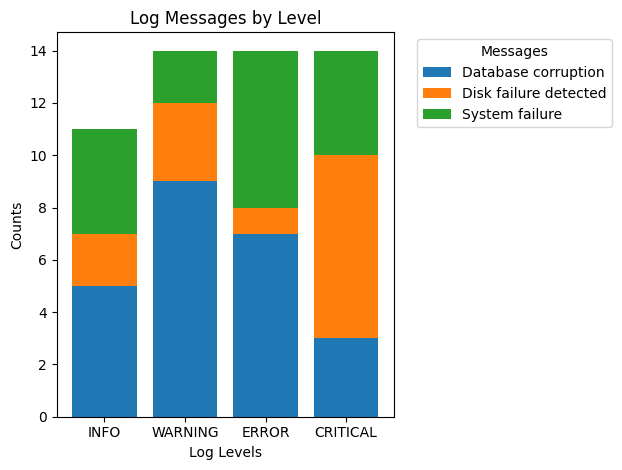

Counts for Database corruption: [6, 10, 7, 6]
Counts for Disk failure detected: [2, 3, 1, 7]
Counts for System failure: [5, 2, 7, 4]


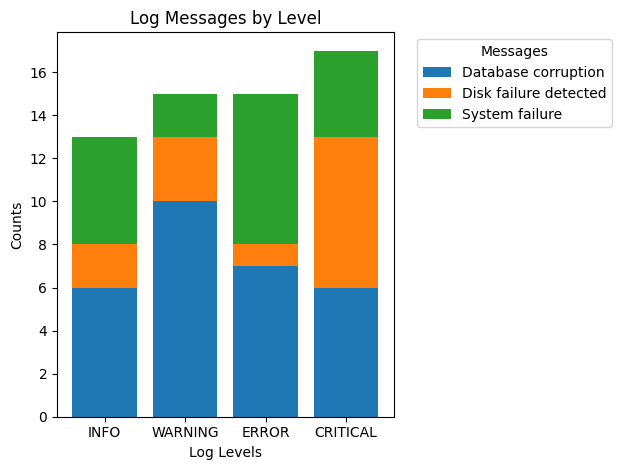

Counts for Database corruption: [6, 13, 9, 6]
Counts for Disk failure detected: [3, 3, 2, 7]
Counts for System failure: [5, 2, 7, 4]
Critical log entry detected!

Time: 2025-04-27 18:36:12  CRITICAL Found at  logGLfolder\log_core.log  with message:  Database corruption



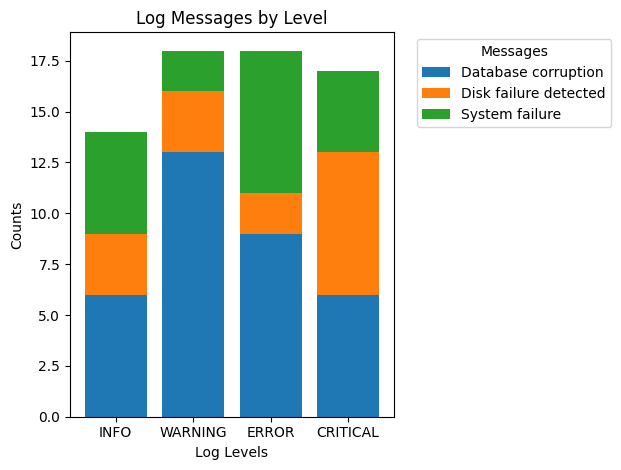

Counts for Database corruption: [7, 15, 10, 7]
Counts for Disk failure detected: [4, 3, 3, 7]
Counts for System failure: [6, 2, 7, 4]
Critical log entry detected!

Time: 2025-04-27 18:36:12  CRITICAL Found at  logGLfolder\log_utils_db.log  with message:  Database corruption



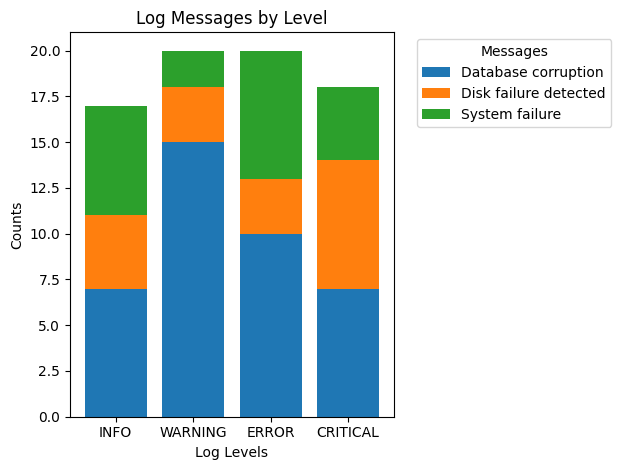

Counts for Database corruption: [8, 16, 10, 8]
Counts for Disk failure detected: [6, 4, 3, 7]
Counts for System failure: [6, 4, 7, 4]
Critical log entry detected!

Time: 2025-04-27 18:36:12  CRITICAL Found at  logGLfolder\log_utils_db.log  with message:  Database corruption

Critical log entry detected!

Time: 2025-04-27 18:36:12  CRITICAL Found at  logGLfolder\log_utils.log  with message:   System failure



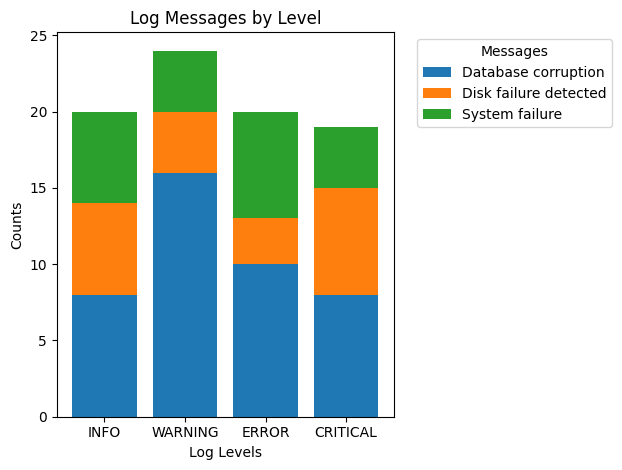

Counts for Database corruption: [10, 16, 11, 9]
Counts for Disk failure detected: [6, 4, 4, 7]
Counts for System failure: [6, 4, 8, 5]
Critical log entry detected!

Time: 2025-04-27 18:36:12  CRITICAL Found at  logGLfolder\log_utils.log  with message:   System failure

Critical log entry detected!

Time: 2025-04-27 18:36:12  CRITICAL Found at  logGLfolder\log_core_db.log  with message:  Disk failure detected

Critical log entry detected!

Time: 2025-04-27 18:36:12  CRITICAL Found at  logGLfolder\log_utils.log  with message:  Disk failure detected



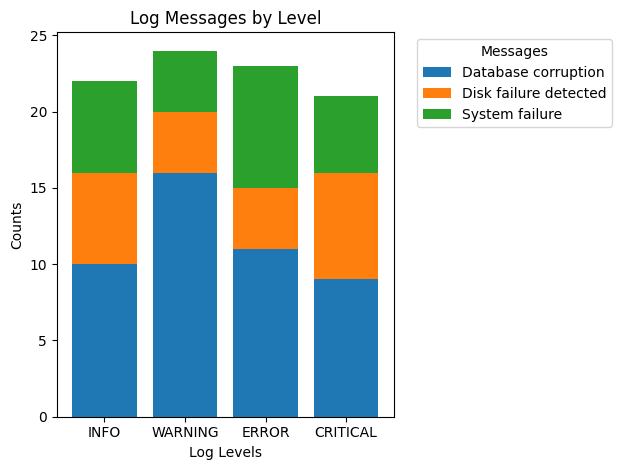

Counts for Database corruption: [10, 16, 12, 9]
Counts for Disk failure detected: [6, 5, 4, 9]
Counts for System failure: [6, 6, 8, 6]
Critical log entry detected!

Time: 2025-04-27 18:36:12  CRITICAL Found at  logGLfolder\log_core_db.log  with message:  Database corruption



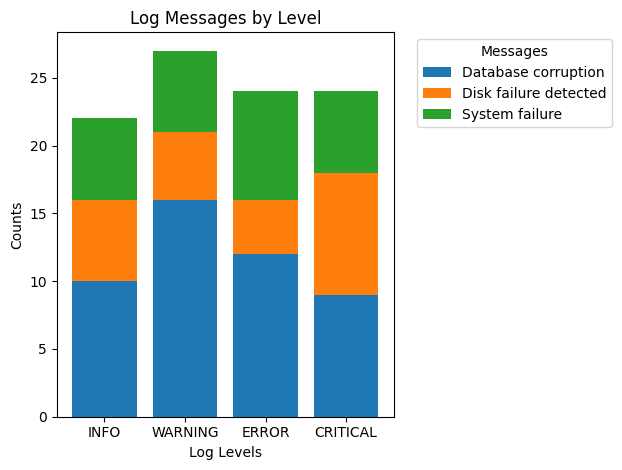

Done!
Final dictionary: {'INFO': {'count': 24, 'Disk failure detected': 6, 'System failure': 6, 'Database corruption': 12}, 'WARNING': {'count': 27, 'Disk failure detected': 5, 'System failure': 6, 'Database corruption': 16}, 'ERROR': {'count': 24, 'System failure': 8, 'Database corruption': 12, 'Disk failure detected': 4}, 'CRITICAL': {'count': 25, 'Disk failure detected': 9, 'System failure': 6, 'Database corruption': 10}}
Exiting in 10 seconds...
Exiting now.


NameError: name 'exit' is not defined

: 

In [ ]:
import lab9_generator
import lab9_parser
import lab9Graph
import threading
import sys
import json

# all the threads are to be ran from here

dictionary = {"INFO": {}, "WARNING": {}, "ERROR": {}, "CRITICAL": {}}

def main():
    t1 = threading.Thread(target=lab9_generator.logGenerator, daemon=True)
    t2 = threading.Thread(target=lab9_parser.logParser, daemon=True, args=("logGLfolder\\log.log",dictionary))
    t3 = threading.Thread(target=lab9Graph.dict_listener, daemon=True, args=(dictionary,))
    

    

    t2.start()
    t3.start()
    t1.start()
    

    # timout added since program was being hung 
    t2.join(timeout=4)
    t3.join(timeout=10)
    t1.join()


    print("Done!")
    print("Final dictionary:", dictionary)

    with open("logGLfolder\\log_summary.json", "w") as json_file:
        json.dump(dictionary, json_file, indent=4)

    # this does not work at all, cry face
    lab9_parser.exitTimer()

   
    

if __name__ == "__main__":
    main()